<a href="https://colab.research.google.com/github/wcj365/python-stats-dataviz/blob/master/08_College_Tuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 08 College Scorecard Data
Exploration of In State Tuition.




In [0]:
# Import useful Python libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statistics
from pylab import rcParams


In [0]:
# use college scorecard 2017-18 acedemic year data

column_list = ["INSTNM", "STABBR","CONTROL", "TUITIONFEE_IN"]
df = pd.read_csv("MERGED2017_18_PP.csv", usecols=column_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 4 columns):
INSTNM           7115 non-null object
STABBR           7115 non-null object
CONTROL          7115 non-null int64
TUITIONFEE_IN    4028 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 222.4+ KB


In [0]:
# Find out the existance of missing values

df.isna().sum()

INSTNM              0
STABBR              0
CONTROL             0
TUITIONFEE_IN    3087
dtype: int64

In [0]:
# Take a look at what colleges have missing tuition

df[df["TUITIONFEE_IN"].isna()].sample(20)

,INSTNM,STABBR,CONTROL,TUITIONFEE_IN
5924,New England Tractor Trailer Training School of...,MA,3,NaN
2657,Cincinnati College of Mortuary Science,OH,2,NaN
6135,Ukiah Adult School,CA,1,NaN
6001,Tulsa Welding School-Jacksonville,FL,3,NaN
5439,Milan Institute of Cosmetology-Reno,NV,3,NaN
6424,The Training Domain,FL,3,NaN
6653,Bull City Durham Beauty and Barber College,NC,3,NaN
5481,Urshan Graduate School of Theology,MO,2,NaN
5619,Southern Worcester County Regional Vocational ...,MA,1,NaN
6452,Unitech Training Academy-Metairie,LA,3,NaN


In [0]:
# Drop the colleges with missing tuition

df = df[df["TUITIONFEE_IN"].isna() == False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4028 entries, 0 to 7114
Data columns (total 4 columns):
INSTNM           4028 non-null object
STABBR           4028 non-null object
CONTROL          4028 non-null int64
TUITIONFEE_IN    4028 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 157.3+ KB


In [0]:
df.describe()

,CONTROL,TUITIONFEE_IN
count,4028.000000,4028.000000
mean,1.776812,15081.399950
std,0.754484,12723.724262
min,1.000000,0.000000
25%,1.000000,5246.250000
50%,2.000000,11296.000000
75%,2.000000,19400.000000
max,3.000000,74514.000000


In [0]:
# Since the min of tuition is 0, let's find out how many of them

df[df["TUITIONFEE_IN"] == 0 ].shape

(4, 4)

In [0]:
# Display the colleges with 0 tuition

df[df["TUITIONFEE_IN"] == 0 ]

,INSTNM,STABBR,CONTROL,TUITIONFEE_IN
577,United States Air Force Academy,CO,1,0.0
629,United States Coast Guard Academy,CT,1,0.0
1500,United States Naval Academy,MD,1,0.0
2449,United States Military Academy,NY,1,0.0


In [0]:
# Drop these colleges with 0 tuition

df = df[df["TUITIONFEE_IN"] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 7114
Data columns (total 4 columns):
INSTNM           4024 non-null object
STABBR           4024 non-null object
CONTROL          4024 non-null int64
TUITIONFEE_IN    4024 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 157.2+ KB


The control is used to classify the type of institution:
- 1 = "Public"
- 2 = "Private nonprofit"
- 3 = "Private for-profit"
We need to convert the varibale from int to string.

In [0]:
# Convert the varibale from int to string

df["CONTROL"] = df["CONTROL"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 7114
Data columns (total 4 columns):
INSTNM           4024 non-null object
STABBR           4024 non-null object
CONTROL          4024 non-null object
TUITIONFEE_IN    4024 non-null float64
dtypes: float64(1), object(3)
memory usage: 157.2+ KB


In [0]:
# Replace the numbers with the explicit names

control_dict = {"1": "Public",
                "2": "Private nonprofit",
                "3": "Private for-profit"}
df["CONTROL"] = df["CONTROL"].map(control_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 0 to 7114
Data columns (total 4 columns):
INSTNM           4024 non-null object
STABBR           4024 non-null object
CONTROL          4024 non-null object
TUITIONFEE_IN    4024 non-null float64
dtypes: float64(1), object(3)
memory usage: 157.2+ KB


In [0]:
df.sample(20)

,INSTNM,STABBR,CONTROL,TUITIONFEE_IN
3963,University of Puerto Rico-Humacao,PR,Public,2117.0
4843,MDT College of Health Sciences,OH,Private for-profit,26535.0
856,Savannah Technical College,GA,Public,2744.0
4177,Nossi College of Art,TN,Private for-profit,17800.0
3902,American Samoa Community College,AS,Public,3950.0
7035,Strayer University-Tampa East Campus,FL,Private for-profit,13857.0
5153,W L Bonner College,SC,Private nonprofit,5436.0
6872,Columbia College - Fort Drum,NY,Private nonprofit,6840.0
2852,Oral Roberts University,OK,Private nonprofit,26792.0
975,Illinois State University,IL,Public,14061.0


In [0]:
df.describe(include="all")

,INSTNM,STABBR,CONTROL,TUITIONFEE_IN
count,4024,4024,4024,4024.000000
unique,3966,59,3,NaN
top,Stevens-Henager College,CA,Public,NaN
freq,7,316,1692,NaN
mean,NaN,NaN,NaN,15096.391402
std,NaN,NaN,NaN,12721.153785
min,NaN,NaN,NaN,480.000000
25%,NaN,NaN,NaN,5255.750000
50%,NaN,NaN,NaN,11315.000000
75%,NaN,NaN,NaN,19400.000000


In [0]:
# Make sure there is no missing value for the institution type
df["CONTROL"].isna().sum()

0

In [0]:
df.describe()

,TUITIONFEE_IN
count,4024.000000
mean,15096.391402
std,12721.153785
min,480.000000
25%,5255.750000
50%,11315.000000
75%,19400.000000
max,74514.000000


In [0]:
# find out the median tuition
# It appears that there is a large difference between the mean and the median
statistics.median(df["TUITIONFEE_IN"])

11315.0

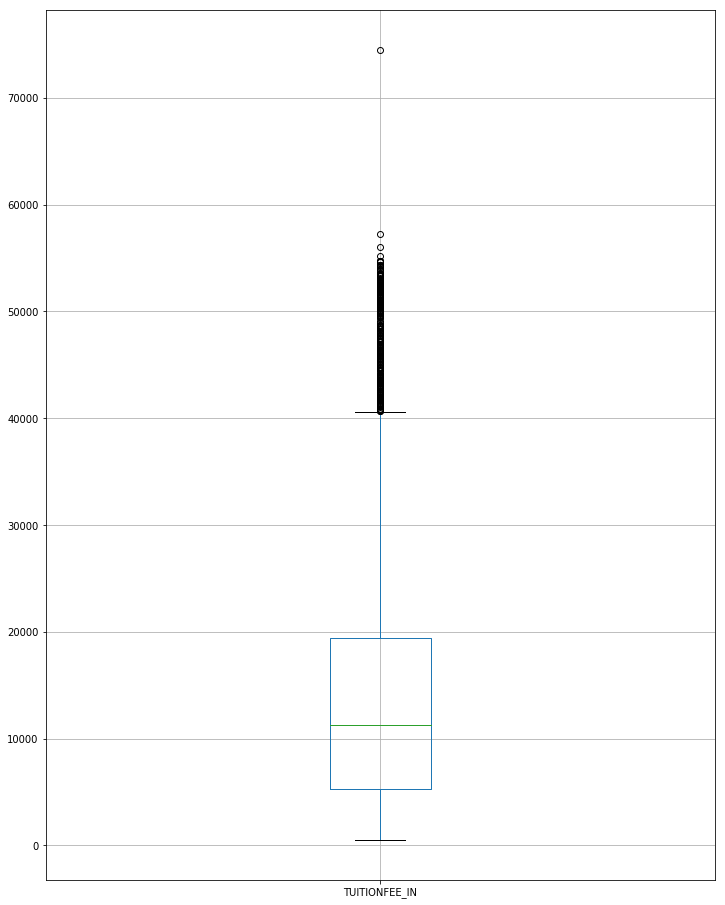

In [0]:
# Make a boxplot
# there are many outliers above the maximum point which explains why the mean is much larger than the median
# The outliers skewed the mean towards higher tuition

fig, ax = plt.subplots(figsize=(12,16))
df.boxplot(ax = ax)

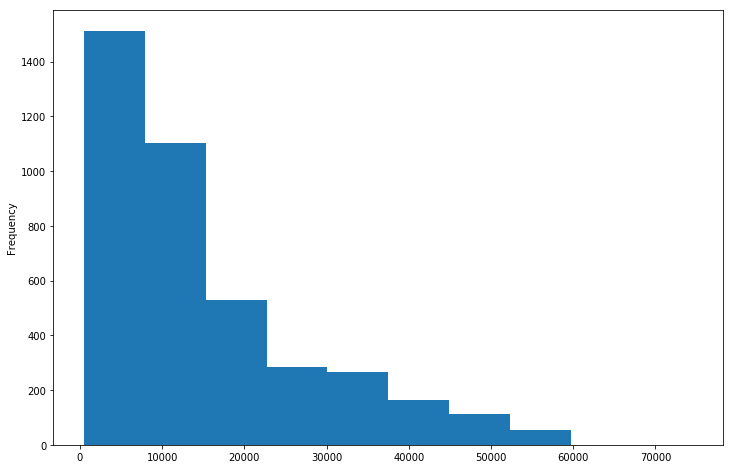

In [0]:
# MAke a histogram

fig, ax = plt.subplots(figsize=(12,8))
df["TUITIONFEE_IN"].plot.hist(ax=ax)

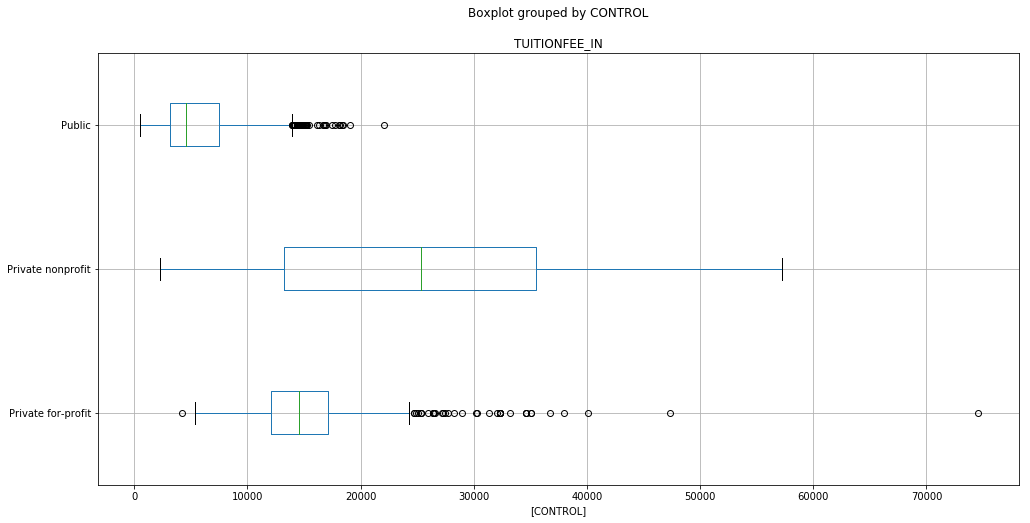

In [0]:
# Make boxplots, one for each type of institution
# IT makes sense public colleges have lowerest tuition
# However, private nonprofit colleges have higher tuition than for-profit colleges. A little counter-intuitive.

fig, ax = plt.subplots(figsize=(16,8))
df.boxplot(ax = ax,by = "CONTROL", vert=False)

Text(0.5, 0, 'Institution Type')

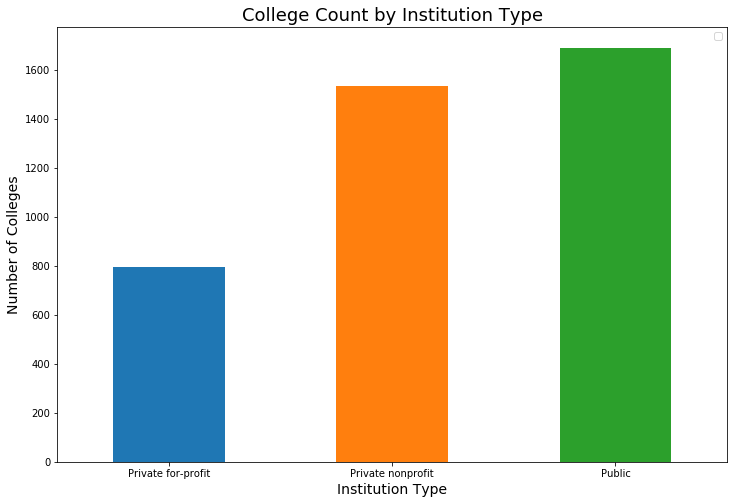

In [0]:
# Plot the count of colleges within each category

fig, ax = plt.subplots(figsize=(12,8))
df[["CONTROL"]].groupby(["CONTROL"]).size().plot.bar(ax=ax, rot=0)
ax.set_title("College Count by Institution Type", size=18)
ax.legend("")
ax.set_ylabel("Number of Colleges", size=14)
ax.set_xlabel("Institution Type",size=14)

In [0]:
# The end